<a href="https://colab.research.google.com/github/veapasichnyk/Codveda-Internship-/blob/main/Task_2_Build_a_Simple_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 2: Build a Simple Linear Regression Model

###Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

###Load a dataset

In [2]:
df = pd.read_csv('Stock Prices Data Set.csv')

In [3]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [4]:
print(df.shape)
print(df.info())

(497472, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
None


###Clean the data (handle missing values)

In [5]:
df_clean = df.dropna(subset=['open', 'high', 'low'])

In [6]:
# Filter one symbol, e.g., "AAPL" (remove this line for multi-stock model)
df_clean = df_clean[df_clean['symbol'] == 'AAPL']

###Select features and target

In [7]:
X = df_clean[['open', 'high', 'low', 'volume']]
y = df_clean['close']

###Split into train/test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###Train `LinearRegression` model

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###Interpret coefficients

In [10]:
coeffs = pd.Series(model.coef_, index=X.columns)
print("Intercept:", model.intercept_)
print("\nCoefficients:")
print(coeffs)

Intercept: -0.07537852102085196

Coefficients:
open     -5.663583e-01
high      8.032015e-01
low       7.642949e-01
volume   -1.320615e-09
dtype: float64


###Predict and evaluate

In [11]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nR² score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R² score: 0.9994
Mean Squared Error: 0.3391


Our multivariate linear regression is performing very well, which is not surprising given:

- Strong linear correlation between open, high, low, and close

- Clean, numeric data with large volume

- A simple but powerful model

###Visualize Predictions vs True

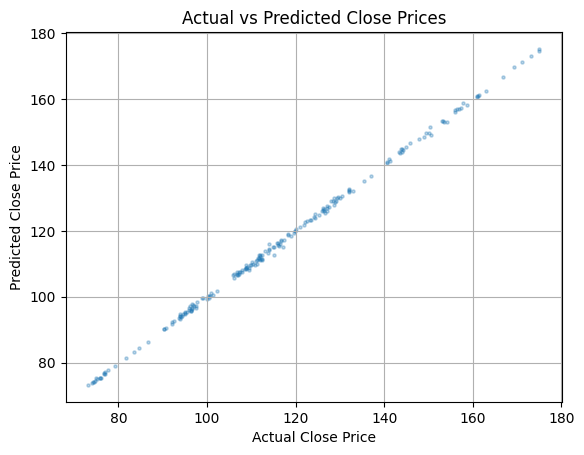

In [13]:
plt.scatter(y_test, y_pred, alpha=0.3, s=5)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Prices")
plt.grid(True)
plt.show()

The points lie almost perfectly along the red diagonal line (ideal prediction).

This means my linear regression model predicts the close prices extremely accurately.

Very small deviations from the line indicate minimal prediction error.